In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from additional_functions import *

# 
pollutans=["co","no2","so2","o3","pm2_5"]
aqi_levels={"pm2_5":[0,10,20,25,50,75],"no2":[0,40,90,120,230,340],"o3":[0,50,100,130,240,380],"so2":[0,100,200,350,500,750]}

In [11]:
#Load Dataframes
pollution=pd.read_csv("Pollution_Data/pollutant_df.csv")
pollution["date"] = pd.to_datetime(pollution["date"])
pollution.set_index("date",inplace=True)
predictor=pd.read_csv("Predictor_Data/all.csv")
#drop this column because another Source provides more non-null values -> Column t_max
predictor=predictor.drop("max_value_temp",axis=1)
predictor["date"] = pd.to_datetime(predictor["date"])
predictor.set_index("date",inplace=True)

In [10]:
predictor.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4017 entries, 2010-01-01 to 2022-12-31
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mean_wind_speed             1812 non-null   float64
 1   max_value_wind_speed        1812 non-null   float64
 2   max_hour_wind_speed         1812 non-null   float64
 3   mean_wind_direction         1812 non-null   float64
 4   max_value_wind_direction    1812 non-null   float64
 5   max_hour_wind_direction     1812 non-null   float64
 6   mean_temp                   3084 non-null   float64
 7   max_value_temp              3084 non-null   float64
 8   max_hour_temp               3084 non-null   float64
 9   mean_humidity               3080 non-null   float64
 10  max_value_humidity          3080 non-null   float64
 11  max_hour_humidity           3080 non-null   float64
 12  mean_radiation              1793 non-null   float64
 13  max_value_radia

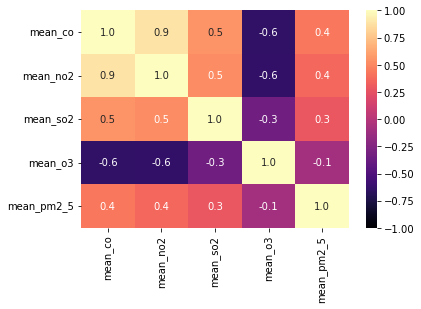

In [4]:
corr_mean_fig, corr_mean_ax = plt.subplots()
pollution_mean_corr=pollution[[f"mean_{i}" for i in pollutans]].corr()
corr_mean_ax = sns.heatmap(pollution_mean_corr,cmap="magma",vmin=-1,vmax=1,annot=True,fmt=".1f" )
corr_mean_fig.savefig("Visualization/EDA/Correlation_Heatmap_Mean_pollutans.png",dpi=200,bbox_inches="tight")

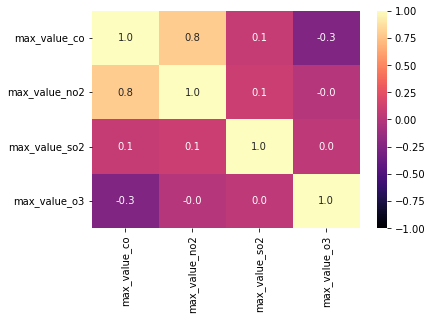

In [5]:
corr_max_fig, corr_max_ax = plt.subplots()
pollution_max_corr=pollution[[f"max_value_{i}" for i in pollutans[:4]]].corr()
sns.heatmap(pollution_max_corr,cmap="magma",vmin=-1,vmax=1,annot=True,fmt=".1f" )
corr_max_fig.savefig("Visualization/EDA/Correlation_Heatmap_Max_pollutans.png",dpi=200,bbox_inches="tight")

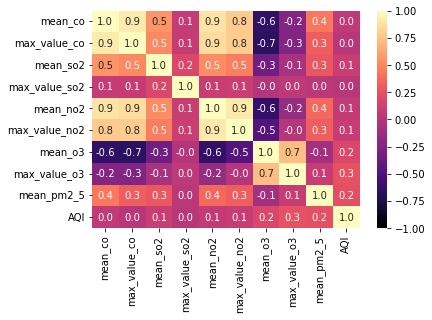

In [6]:
corr_fig, corr_ax = plt.subplots()
pollution_corr=pollution.drop([f"max_hour_{i}" for i in pollutans[:4]],axis=1).corr()
sns.heatmap(pollution_corr,cmap="magma",vmin=-1,vmax=1,annot=True,fmt=".1f")
corr_fig.savefig("Visualization/EDA/Correlation_Heatmap_pollutans.png",dpi=200,bbox_inches="tight")

## Korrelation zwischen den Schadstoffen

### Mittlere Tageswerte

Starke Korrellation: zwischen NO2 und CO
maßige Korr.: zw. SO2 und CO/NO2, PM2.5 und CO/NO2/SO2
keine/geringe Korr.: Ozon und PM2.5/SO2
negative Korr.: O3 und CO/NO2

### Zwischen den mean und max Werten: 

Starke Korrelation bedeuten, lange Lebensdauer oder der Grund für den Schadstoff "dauert lange"
- CO 0.9
- NO2 0.9
- O3 0.7

Gering: SO2 0.2

### Zwischen den maximal Werten: 

Nur zwischen NO2 und CO, der Rest nur geringe Korrelation


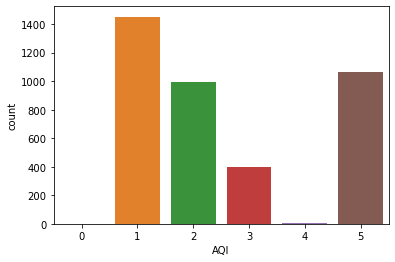

In [7]:
aqi_fig, aqi_ax = plt.subplots()
sns.countplot(x=pollution["AQI"])
aqi_fig.savefig("Visualization/EDA/AQI.png",dpi=200,bbox_inches="tight")

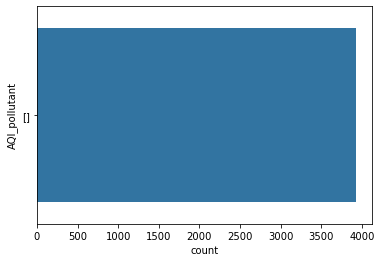

In [8]:
aqi_reason_fig, aqi_reason_ax = plt.subplots()
sns.countplot(y=pollution["AQI_pollutant"],orient="v")
aqi_reason_fig.savefig("Visualization/EDA/AQI_reasons.png",dpi=200,bbox_inches="tight")

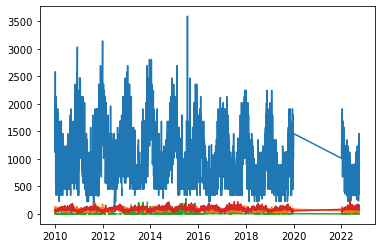

In [9]:
year_fig, year_ax = plt.subplots()
for y in [f"max_value_{i}" for i in pollutans[:4]]:
    year_ax.plot(pollution[y])

In [52]:
# show the change over the year
pollution_year = pollution
pollution["month"] = (pollution.index).month
pollution_year = pollution_year.groupby(by="month").mean()
scaler=StandardScaler()


<AxesSubplot:title={'center':'Histogra_max_value_no2'}, xlabel='max_value_no2', ylabel='Percent'>

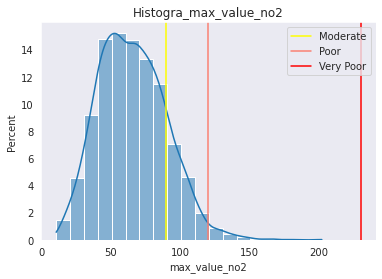

In [60]:
def pollutant_hist(pollutant,bins=5,max_value=True,show_aqi="all"):
    global aqi_levels
    sns.set_style("dark")
    if max_value:
        colname=f"max_value_{pollutant}"
    else:
        colname=f"mean_{pollutant}"
    fig=sns.histplot(pollution[colname],stat="percent",binwidth=bins,kde=True)
    fig.axvline(aqi_levels[pollutant][2],color="yellow",label="Moderate")
    if show_aqi=="all":
        fig.axvline(aqi_levels[pollutant][3],color="salmon",label="Poor")
        fig.axvline(aqi_levels[pollutant][4],color="red",label="Very Poor")
    fig.set_title(f"Histogra_{colname}")
    fig.legend()
    return fig

pollutant_hist("no2",bins=10)

<AxesSubplot:title={'center':'Histogra_mean_pm2_5'}, xlabel='mean_pm2_5', ylabel='Percent'>

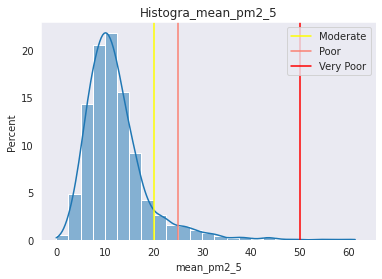

In [64]:
pollutant_hist("pm2_5",bins=2.5,max_value=False)

<AxesSubplot:title={'center':'Histogra_max_value_so2'}, xlabel='max_value_so2', ylabel='Percent'>

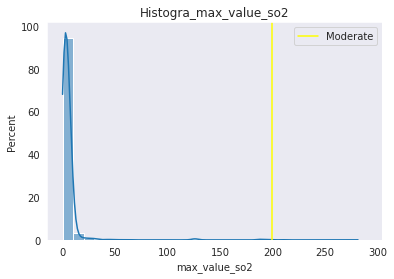

In [61]:
pollutant_hist("so2",bins=10,show_aqi="moderate")

<AxesSubplot:title={'center':'Histogra_max_value_o3'}, xlabel='max_value_o3', ylabel='Percent'>

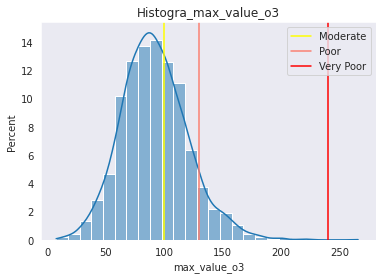

In [63]:
pollutant_hist("o3",bins=10,show_aqi="all")

Damit wird deutlich, welche der Schadstoffe in LA hauptsächlich zur Luftverschmutzung beitragen:
- **O3** mit fast 50 % Moderat und schlechter
- PM 2.5 
- NO2 mit fast 25 % Moderat und schlechter

SO2 ist dagegen nicht relevant. Das könnte daran liegen das der Standort in Downtown LA liegt und daher wenig Industrie benachbart ist und mittlerweile überall SO2 Filter-Systeme vorhanden sind.

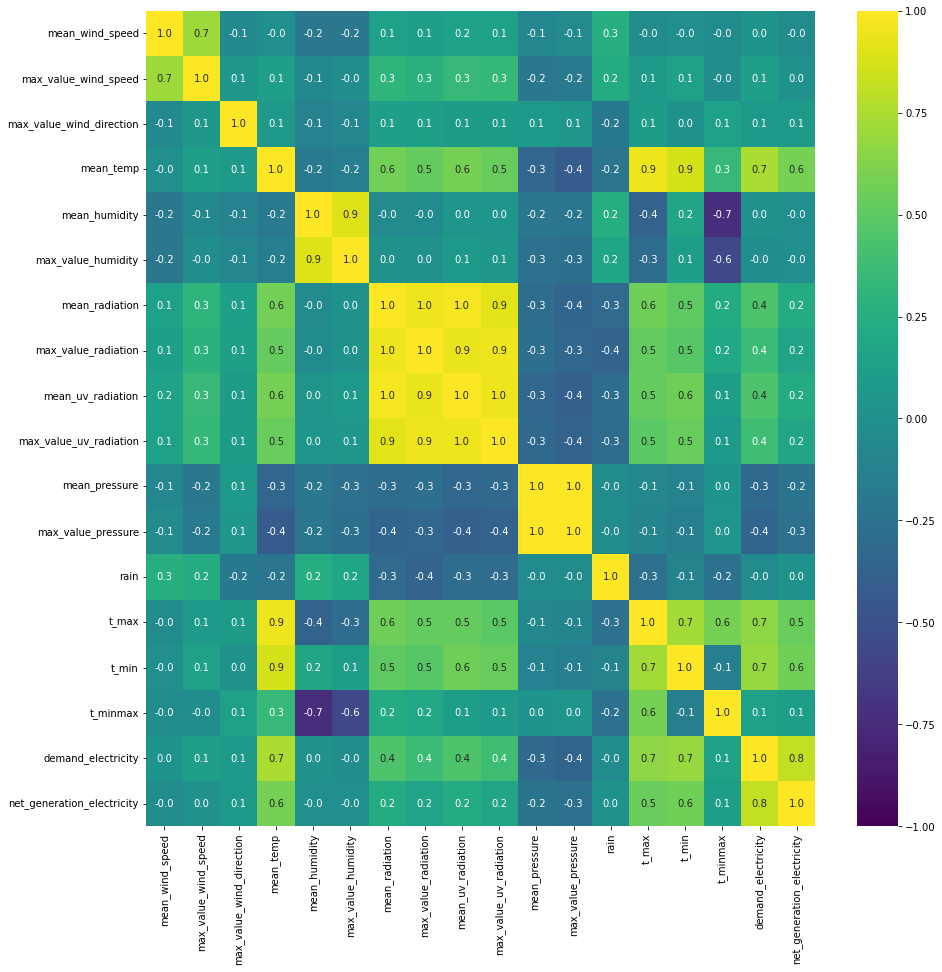

In [17]:
' ! Entfernen aller nicht Intervall/Ratioskalierten Werte d.h. z.B: Monat oder Windrichtung'
'Zählt dazu auch die Spalten mit max_hour_temp ???'
corr_fig, corr_ax = plt.subplots(figsize=(15,15))
predictor_corr=predictor.drop( ['day_of_week',
       'month', 'quarter', 'year',"mean_wind_direction",
       "max_hour_wind_speed","max_hour_wind_direction","max_hour_humidity","max_hour_radiation","max_hour_uv_radiation","max_hour_radiation",
       "max_hour_pressure","max_hour_temp"],axis=1).corr()
sns.heatmap(predictor_corr,cmap="viridis",vmin=-1,vmax=1,annot=True,fmt=".1f")
corr_fig.savefig("Visualization/EDA/Correlation_Heatmap_predictor.png",dpi=200,bbox_inches="tight")

## Resultate aus der Correlation Heatmap
- unspannend: Korrelation zwischen den mean und max Werten der jeweiligen Features
- hohe Temperaturen verursachen einen hohen Stromverbrauch --> Klimaanlagen
- hohe Temperaturdifferenzen an einem Tag (t_min_max) sorgen für hohe Luftfeuchtigkeit -> abgekühlte Luft kann nicht so viel Feuchtigkeit aufnehmen
- 